In [220]:
import pandas as pd
# importing the dataset
data = pd.read_csv('D:/Sai Manoj P/projects/CustomerSegmentationAnalysis/bank_transactions.csv')

Getting an overview of the data in the dataset

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [222]:
# checking for number of unique values in each column
data.nunique()

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

In [223]:
data.CustGender.unique()

array(['F', 'M', nan, 'T'], dtype=object)

In [224]:
# verifying that there are any duplicates in the data
data[data.duplicated(subset='TransactionID', keep=False)]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


'TransactionID' is considered for checking duplicates, as it should be the unique parameter in the dataset and it looks like there is no transaction duplicated.

In [225]:
# checking for missing values in the dataset
data.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

There are missing values in customerDOB, Gender, Location and AcntBalance columns. lets see how we can handle them.

In [226]:
missing_counts = [3397,1100,151,2369]
for count in missing_counts:
    print(round((count/data.shape[0])*100,2))

0.32
0.1
0.01
0.23


As the values are very small percentage of the data. By removing them, don't have any significiant impact on the analysis.

In [227]:
# dropping the rows with missing values 
data.dropna(inplace=True)

In [228]:
data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [229]:
# checking that dtypes are valid or not
data.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

CustomerDOB and TransactionDate need be converted to date datatype


In [230]:
data['CustomerDOB']

0           10/1/94
1            4/4/57
2          26/11/96
3           14/9/73
4           24/3/88
             ...   
1048562      8/4/90
1048563     20/2/92
1048564     18/5/89
1048565     30/8/78
1048566      5/3/84
Name: CustomerDOB, Length: 1041614, dtype: object

In [231]:
# Converting the CustomerDOB dtype but not assigning it back 
pd.to_datetime(data['CustomerDOB'], format='%d/%m/%y',errors='coerce')

0         1994-01-10
1         2057-04-04
2         1996-11-26
3         1973-09-14
4         1988-03-24
             ...    
1048562   1990-04-08
1048563   1992-02-20
1048564   1989-05-18
1048565   1978-08-30
1048566   1984-03-05
Name: CustomerDOB, Length: 1041614, dtype: datetime64[ns]

There is a issue with date format being interpreted as '2057' instead of '1957' is due to the default behavior of the pd.to_datetime() function. By default, when you parse two-digit years, Pandas assumes that years less than 69 are in the 2000s, and years greater than or equal to 69 are in the 1900s. This is known as the "2069 cutoff."  
To correctly interpret years in the "dd/mm/yy" format as '1957' for '4/4/57', we can set a custom "century pivot" using the datetime.datetime.strptime method.

In [232]:
from datetime import datetime

# Function to convert years into the correct format
def parse_date(date_str):
    try:
        # Attempt to parse the date in 'dd/mm/yy' format
        date = datetime.strptime(date_str, '%d/%m/%y')
    except ValueError:
        # Date in customerDOB is in two different formats
        try:
            # If that fails, attempt to parse it in 'dd/mm/yyyy' format
            date = datetime.strptime(date_str, '%d/%m/%Y')
        except ValueError:
            return None  # Return None if both formats fail
    # Adjust the year based on the century pivot
    if date.year > 2017:
        return date.replace(year=date.year - 100)
    return date

# Applying the function to the 'CustomerDOB' column
data['CustomerDOB'] = data['CustomerDOB'].apply(parse_date)

In [233]:
data[data['CustomerDOB']=='Nan']['CustomerID']

Series([], Name: CustomerID, dtype: object)

In [234]:
data['CustomerDOB']

0         1994-01-10
1         1957-04-04
2         1996-11-26
3         1973-09-14
4         1988-03-24
             ...    
1048562   1990-04-08
1048563   1992-02-20
1048564   1989-05-18
1048565   1978-08-30
1048566   1984-03-05
Name: CustomerDOB, Length: 1041614, dtype: datetime64[ns]

CustomerDOB dtype is converted succesfully with precise year.

In [235]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d/%m/%y',errors='coerce')
data['TransactionDate']

0         2016-08-02
1         2016-08-02
2         2016-08-02
3         2016-08-02
4         2016-08-02
             ...    
1048562   2016-09-18
1048563   2016-09-18
1048564   2016-09-18
1048565   2016-09-18
1048566   2016-09-18
Name: TransactionDate, Length: 1041614, dtype: datetime64[ns]

In [236]:
data.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
dtype: object

Let's perform demographic customerSegmentation based on gender and age. As there is no age column, we'll create it from customerDOB. 

In [237]:
# lets assume today as jan2017 as the data is of 2016
today = pd.Timestamp('2017-01-01')
data['Age'] = (today - data['CustomerDOB']).apply(lambda x: x.days // 365)

In [238]:
data['AgeGroup'] = ['Young' if age <= 20 else 'Middle-Age' if 20 < age <= 40 else 'Elderly' for age in data['Age']]

In [239]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,Middle-Age
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,Elderly
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,Young
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,Elderly
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,Middle-Age


In [240]:
# saving cleaned csv
data.to_csv('cleaned_data.csv', index=False)

In [241]:
data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
AgeGroup                   0
dtype: int64

In [242]:
data2 = data.groupby(['CustGender','AgeGroup'])['TransactionID'].count().reset_index()

In [243]:
data2

,CustGender,AgeGroup,TransactionID
0,F,Elderly,39553
1,F,Middle-Age,235433
2,F,Young,5649
3,M,Elderly,134544
4,M,Middle-Age,609527
5,M,Young,16907
6,T,Elderly,1


In [244]:
data2 = data2[data2['TransactionID']!=0]
data2

,CustGender,AgeGroup,TransactionID
0,F,Elderly,39553
1,F,Middle-Age,235433
2,F,Young,5649
3,M,Elderly,134544
4,M,Middle-Age,609527
5,M,Young,16907
6,T,Elderly,1


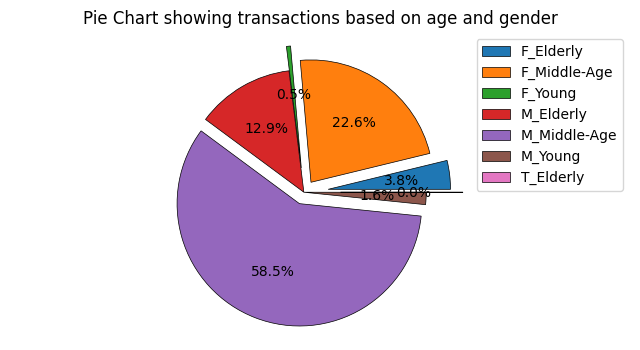

In [245]:
import matplotlib.pyplot as plt

# Convert 'CustGender' and 'AgeGroup' columns to strings
labels = (data2['CustGender'].astype(str) + '_' + data2['AgeGroup'].astype(str))
explode = (0.2,0.1,0.2,0,0.1,0,0.3)

# Create the bar plot
plt.figure(figsize=(8,4))
plt.pie(data2['TransactionID'],explode= explode,autopct ='%1.1f%%',
        wedgeprops={"edgecolor":"k",'linewidth': 0.5,'linestyle': '-'})
plt.legend(labels)
plt.title('Pie Chart showing transactions based on age and gender')
plt.axis('equal')
plt.show()

The Pie Chart indicates that the age group between 20 and 40 years old made more transactions and the number of transactions by males is noticeably higher than that by females.

Let's perform Location-wise analysis to identify regional trends.

In [246]:
# Grouping the data by location 
location_grouped = data.groupby('CustLocation')

# creating dataframe with aggregated statistics
location_stats = location_grouped.agg({
    'CustomerID': 'nunique',  # Count unique Customer IDs
    'CustAccountBalance': 'mean',
    'TransactionAmount (INR)': 'sum',
    'TransactionID': 'count'  # Count the total number of transactions
}).reset_index()
location_stats.columns = ['Location', 'CustomerCount', 'AverageBalance', 'TotalTransactionAmount', 'TransactionCount']
location_stats


,Location,CustomerCount,AverageBalance,TotalTransactionAmount,TransactionCount
0,(154) BHASKOLA FARIDABAD,11,49388.09,5940.35,11
1,(BEFORE YMCA BLDG) CHENNAI,1,659.33,1200.00,1
2,(BENAKA MDTS) BANGALORE,20,57.24,3442.05,21
3,(BRINDA BAN ) KOLKATA,5,7967.89,3143.00,5
4,(DT) HOSUR,11,6134.27,15380.11,11
...,...,...,...,...,...
9270,ZONE WHITEFIELD BANGALORE,40,36724.28,96773.57,41
9271,ZOPADPATTI TEHSIL KURLA MUMBAI,1,28983.98,7990.00,1
9272,ZUARINAGAR,6,17338.82,6088.86,6
9273,ZUMARI TILAIYA,9,1046346.96,8450.02,9


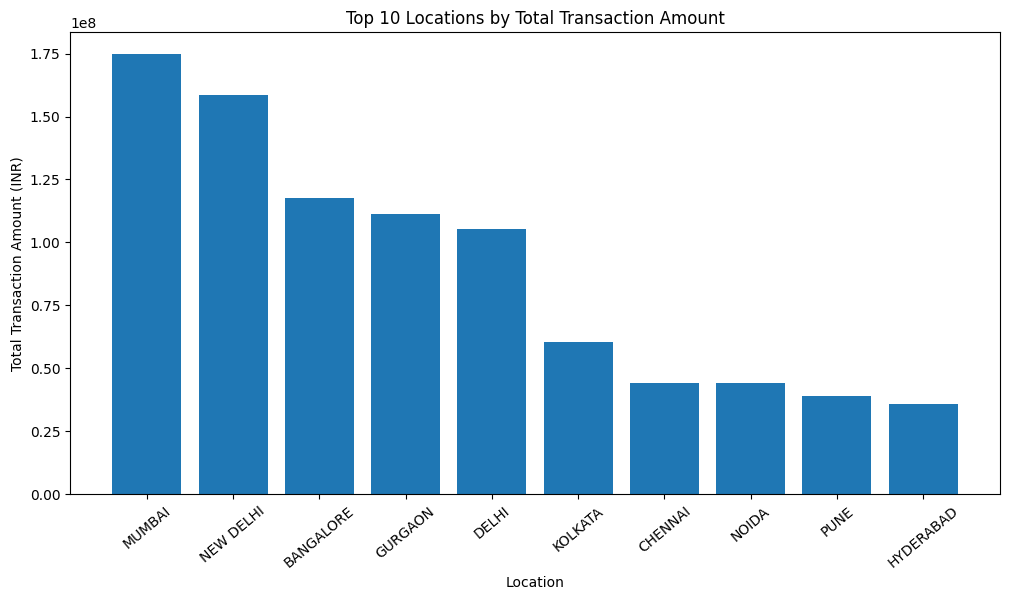

In [247]:
# Selecting the top N locations based on transaction amount(e.g., top 10)
top_locations_amount = location_stats.sort_values(by='TotalTransactionAmount', ascending=False).head(10)

# Creating a bar chart for the top locations
plt.figure(figsize=(12, 6))
bars = plt.bar(top_locations_amount['Location'], top_locations_amount['TotalTransactionAmount'])
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.title('Top 10 Locations by Total Transaction Amount')
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability

plt.show()



Mumbai, Delhi, and Bangalore appear to be the locations with the highest transaction amounts. To understand the reason behind this, we need to determine whether it's because these locations have more customers or because there are more transactions originating from these places.

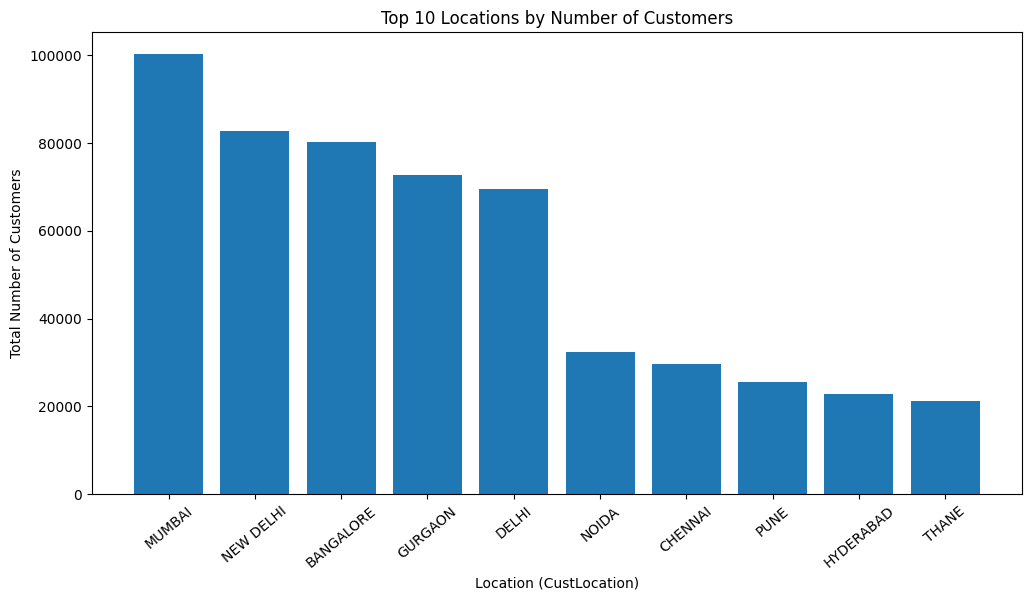

In [248]:
# Selecting the top N locations based on number of customers (e.g., top 10)
top_locations_customers = location_stats.sort_values(by='CustomerCount', ascending=False).head(10)

# Creating a bar chart for the top locations
plt.figure(figsize=(12, 6))
bars = plt.bar(top_locations_customers['Location'], top_locations_customers['CustomerCount'])
plt.xlabel('Location (CustLocation)')
plt.ylabel('Total Number of Customers')
plt.title('Top 10 Locations by Number of Customers')
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability

plt.show()

In [249]:
top_locations = location_stats.sort_values(by='TransactionCount', ascending=False).head(10)
top_locations

,Location,CustomerCount,AverageBalance,TotalTransactionAmount,TransactionCount
5219,MUMBAI,100198,154281.864562,1.747338e+08,101997
5738,NEW DELHI,82811,192450.453458,1.584735e+08,84143
770,BANGALORE,80128,102518.067872,1.174852e+08,81330
3058,GURGAON,72637,177232.125498,1.114485e+08,73594
2055,DELHI,69611,107557.075197,1.051617e+08,70549
5833,NOIDA,32443,110244.372042,4.424702e+07,32656
1591,CHENNAI,29654,89530.634858,4.427020e+07,29840
6656,PUNE,25550,98689.569965,3.906549e+07,25690
3367,HYDERABAD,22857,130806.950079,3.597353e+07,22976
8310,THANE,21297,66744.825912,2.698865e+07,21397


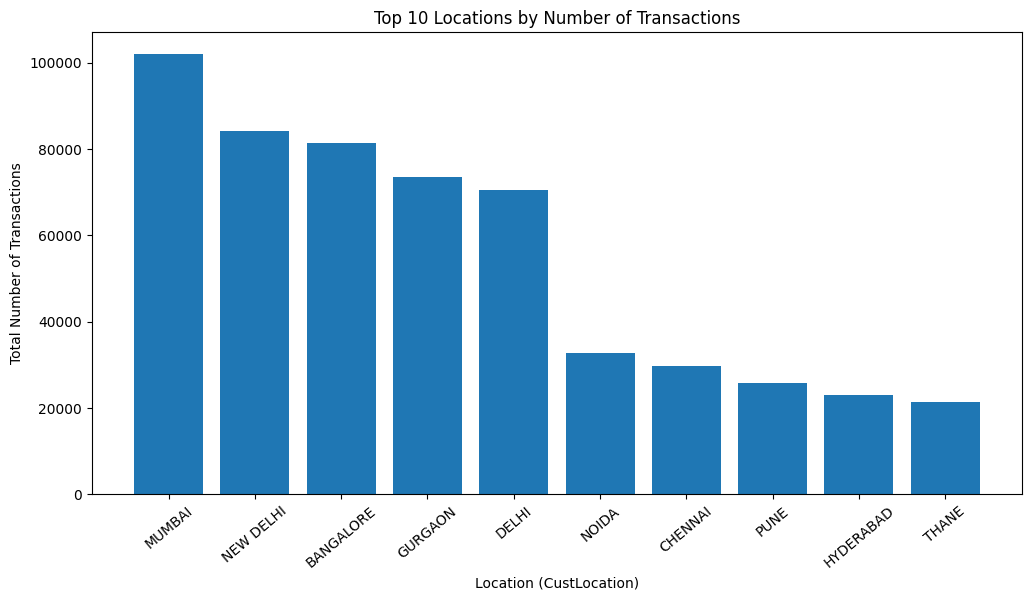

In [250]:
# Selecting the top N locations based on number of transactions (e.g., top 10)
top_locations = location_stats.sort_values(by='TransactionCount', ascending=False).head(10)

# Creating a bar chart for the top locations
plt.figure(figsize=(12, 6))
bars = plt.bar(top_locations['Location'], top_locations['TransactionCount'])
plt.xlabel('Location (CustLocation)')
plt.ylabel('Total Number of Transactions')
plt.title('Top 10 Locations by Number of Transactions')
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability

plt.show()


It appears that these locations have a high number of customers, and the number of transactions is also proportionate to the number of customers. Therefore, the reason for the major total sum of transactions in these locations is likely due to the larger customer base in these areas.

### Summary Insights:  
  
**Location Impact**: Mumbai, Delhi, and Bangalore shine with the highest transaction amounts, mainly due to their substantial customer bases.  

**Demographic Focus**: Customers aged 20-40 are the most active, with males dominating transactions.  

**Actionable Opportunities**: Segment customers by age and gender for targeted marketing. Prioritize the 20-40 age group and address gender disparities.  

**Location Strategies**: Consider location-specific tactics for high transaction areas.